In [1]:
from sklearn.datasets import make_regression #used to create regression sample dataset
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [2]:
# generate regression dataset
X, y = make_regression(n_samples=5000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:, 0]
# Spilt into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [3]:
#define model
model1 = Sequential()
model1.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(1, activation='linear'))
opt = SGD(lr=0.1, momentum=0.9)
model1.compile(loss='mean_squared_error', optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [4]:
#fit model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

In [5]:
# evaluate the model
train_mse = model1.evaluate(X_train, y_train, verbose=0)
test_mse = model1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.000


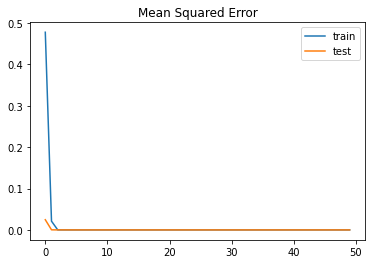

In [6]:
#plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

##2. Mean Squared Logarithmic Error Loss
Suppose we want to reduce the difference between the actual and predicted variable we can take the natural logarithm of the predicted variable then take the mean squared error.

This will overcome the problem possessed by the Mean Square Error Method. The model will now penalize less in comparison to the earlier method.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


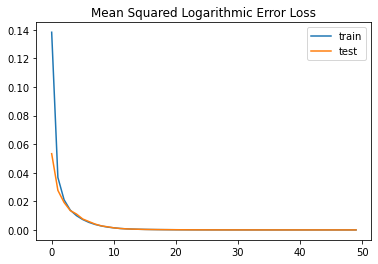

In [7]:
#define model
model2 = Sequential()
model2.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model2.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
#fit model
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
#evaluate the model 
train_mse = model2.evaluate(X_train, y_train, verbose=0)
train_mse = model2.evaluate(X_test, y_test, verbose = 0)
# plot loss during training
pyplot.title('Mean Squared Logarithmic Error Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


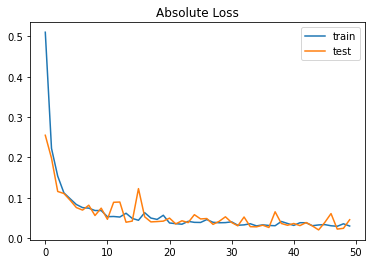

In [8]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

X, y = make_regression(n_samples=5000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 2500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)

# plot loss during training
pyplot.title('Absolute Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Binary Classification Loss Function
Suppose we are dealing with a Yes/no situation in this kind of scenario Binary Classifiction Loss Functin is used

1. Binary Cross Entropy Loss
It gives the probablity values between 0 and 1 for a classification tast

Cross-Entropy calcualtes the average difference between the predicted and actual probalities

In [9]:
from sklearn.datasets import make_circles
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
#generate 2d classification dataset
X, y = make_circles(n_samples=5000, noise=0.1, random_state=1)
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [10]:
#define model
model3 = Sequential()
model3.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#fit model
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
#evaluate the model
train_acc = model3.evaluate(X_train, y_train, verbose=0) #returns list of two values i.e loss and accuracy
test_acc = model3.evaluate(X_test, y_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


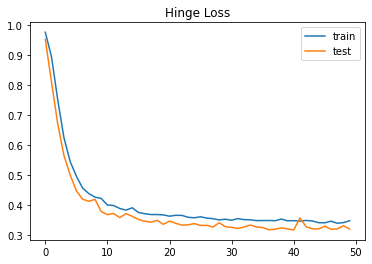

In [11]:
#Hinge loss
model4 = Sequential()
model4.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model4.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
# evaluate the model
train_acc = model4.evaluate(X_train, y_train, verbose=0)
test_acc = model4.evaluate(X_test, y_test, verbose=0)
# plot loss during training
pyplot.title('Hinge Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


110/110 - 1s - loss: 1.1232 - accuracy: 0.6580 - val_loss: 0.7103 - val_accuracy: 0.7087 - 793ms/epoch - 7ms/step
Epoch 2/50
110/110 - 0s - loss: 0.5277 - accuracy: 0.7749 - val_loss: 0.4568 - val_accuracy: 0.7920 - 203ms/epoch - 2ms/step
Epoch 3/50
110/110 - 0s - loss: 0.4770 - accuracy: 0.7906 - val_loss: 0.4981 - val_accuracy: 0.7860 - 221ms/epoch - 2ms/step
Epoch 4/50
110/110 - 0s - loss: 0.4431 - accuracy: 0.8049 - val_loss: 0.4399 - val_accuracy: 0.8033 - 222ms/epoch - 2ms/step
Epoch 5/50
110/110 - 0s - loss: 0.4337 - accuracy: 0.8071 - val_loss: 0.4955 - val_accuracy: 0.7920 - 223ms/epoch - 2ms/step
Epoch 6/50
110/110 - 0s - loss: 0.4403 - accuracy: 0.8120 - val_loss: 0.4316 - val_accuracy: 0.8067 - 201ms/epoch - 2ms/step
Epoch 7/50
110/110 - 0s - loss: 0.4289 - accuracy: 0.8146 - val_loss: 0.4303 - val_accuracy: 0.8033 - 209ms/epoch - 2ms/step
Epoch 8/50
110/110 - 0s - loss: 0.4152 - accuracy: 0.8183 - val_loss: 0.4861 - val_accuracy: 0.7953 - 222ms/epoch - 2ms/step
Epoch 9/50


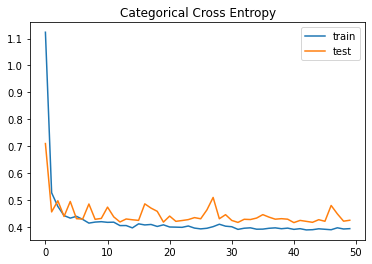

In [12]:
#Multi-class Cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
#generate 2d classification dataset
X, y = make_blobs(n_samples=5000, centers=3, n_features=2, cluster_std=2, random_state=2)
#one hot encode output variable
y = to_categorical(y)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
#define model
model5 = Sequential()
model5.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model5.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#fit model
history = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)
#evaluate the model
train_acc = model5.evaluate(X_train, y_train, verbose=0)
test_acc = model5.evaluate(X_test, y_test, verbose=0)

#plot loss during training
pyplot.title('Categorical Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


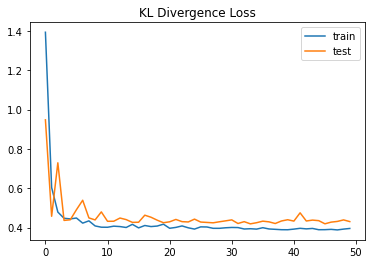

In [13]:
# KL Divergence
model6 = Sequential()
model6.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model6.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model6.compile(optimizer=opt, loss='kullback_leibler_divergence', metrics=['accuracy'])
# fit model
history = model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
#evaluate the model
train_acc = model6.evaluate(X_train, y_train, verbose=0)
test_acc =model6.evaluate(X_test, y_test, verbose=0)
#plot loss during training
pyplot.title('KL Divergence Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
